In [14]:
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
data = pd.read_excel('AB_Test_Results.xlsx')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [17]:
print("Количество пользователей в контрольной группе:", data.loc[data['VARIANT_NAME'] == 'control', 'USER_ID'].nunique())
print("Количество пользователей в тестовой группе:", data.loc[data['VARIANT_NAME'] == 'variant', 'USER_ID'].nunique())

Количество пользователей в контрольной группе: 3931
Количество пользователей в тестовой группе: 3934


In [18]:
data['VARIANT_NAME'].value_counts(normalize=True)

variant    0.5016
control    0.4984
Name: VARIANT_NAME, dtype: float64

In [32]:
unique_users = data.groupby('VARIANT_NAME')['USER_ID'].nunique().reset_index()
unique_users

,VARIANT_NAME,USER_ID
0,control,3931
1,variant,3934


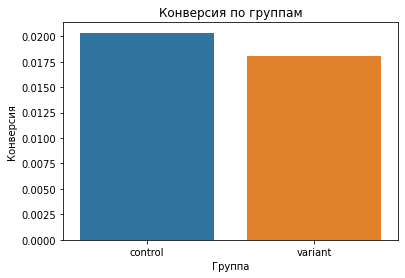

,VARIANT_NAME,USER_ID_x,USER_ID_y,conversion_rate
0,control,3931,80,0.020351
1,variant,3934,71,0.018048


In [40]:
conversion = pd.merge(unique_users, paying_users, on='VARIANT_NAME')
conversion['conversion_rate'] = conversion['USER_ID_y'] / conversion['USER_ID_x']

sns.barplot(x='VARIANT_NAME', y='conversion_rate', data=conversion)
plt.title('Конверсия по группам')
plt.xlabel('Группа')
plt.ylabel('Конверсия')
plt.show()
conversion

In [19]:
data.groupby('VARIANT_NAME')['REVENUE'].describe()

,count,mean,std,min,25%,50%,75%,max
VARIANT_NAME,,,,,,,,
control,4984.0,0.129013,3.007524,0.0,0.0,0.0,0.0,196.01
variant,5016.0,0.070070,1.314802,0.0,0.0,0.0,0.0,58.63


In [31]:
paying_users = data[data['REVENUE'] > 0].groupby('VARIANT_NAME')['USER_ID'].nunique().reset_index()
paying_users

,VARIANT_NAME,USER_ID
0,control,80
1,variant,71


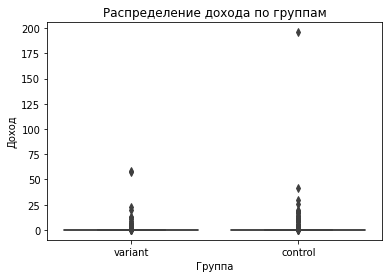

In [29]:
sns.boxplot(x='VARIANT_NAME', y="REVENUE", data=data)
plt.title('Распределение дохода по группам')
plt.xlabel('Группа')
plt.ylabel('Доход')
plt.show()

In [22]:
control = data.loc[data['VARIANT_NAME'] == 'control', 'REVENUE']
test = data.loc[data['VARIANT_NAME'] == 'variant', 'REVENUE']
t_statistic, p_value = stats.ttest_ind(control, test)

print(f"t-статистика: {t_statistic:.2f}")
print(f"p-значение: {p_value:.2f}")

t-статистика: 1.27
p-значение: 0.20
